**Libraries**

In [1]:
import pandas as pd
import numpy as np

import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import joypy #el de las densidades guays

from sklearn import manifold  


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import os 
cwd = os.getcwd() + "/"
cwd="/home/angela/Notebook/machine_learning/normalizados/NN_simple_param/"
from sklearn import metrics

from sklearn.neural_network import MLPClassifier


warnings.filterwarnings('ignore') #ATENCION QUE ESTO CREO QUE FUNCIONA PARA TODO EL NOTEBOOK

import random
random.seed(1)
np.random.seed(1)
np.random.RandomState(1)

from sklearn.preprocessing import MinMaxScaler




**LOAD**

In [2]:
#ALL THE DATASET

df=pd.read_pickle("/home/angela/Notebook/data/normalizados/trainpickle")
df_originaltest=pd.read_pickle("/home/angela/Notebook/data/normalizados/testpickle")

In [3]:
#SIMPLe DATASET
#df=pd.read_pickle("/home/angela/Notebook/data/normalizados/trainsimplepickle")
#df_originaltest=pd.read_pickle("/home/angela/Notebook/data/normalizados/testsimplepickle")


# Machine learning

**We will follow the scikit-learn schema to train and validate the model**


https://scikit-learn.org/stable/modules/cross_validation.html


## SVM

In [4]:
#Scores


def Scores(y_true,y_pred):
    
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    prec=tp / (tp + fp)
    recall= tp / (tp + fn)
    F1_score= 2 * (prec * recall) / (prec + recall)
    acc=metrics.accuracy_score(y_true,y_pred)
    kappa_cohen=metrics.cohen_kappa_score(y_true,y_pred)
        
    return(tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen)


def model(X_train,y_train,X_test):
    
    scaler = MinMaxScaler()
    scaler=scaler.fit(X_train)
    
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    model = MLPClassifier() 
    
    #grid search, copy of kaggle: https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv#L72
    #defalult (scikit learn) :  best_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)))

    #params = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}    #model = SVC(probability=True) 
    #reduced: 
    params = {'solver': ['lbfgs'], 'max_iter': [200,600,1000,1400,1800], 'alpha': 10.0 ** -np.arange(4, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0]}    #model = SVC(probability=True) 

    grid = GridSearchCV(estimator=model, param_grid=params,cv=5,verbose=1, n_jobs=2)

    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    
    best_model.fit(X_train,y_train)
    # Predict test set labels
    y_pred = best_model.predict(X_test)    
    y_pred_proba = best_model.predict_proba(X_test)[::,1] #Neccesary to make the ROC curve 

    return(grid,best_model,y_pred,y_pred_proba)

## Entrenando y testeando con la masa

In [5]:
cwd1=cwd+"con1000"


mass= 500
train mass   500.0   750.0   1000.0  1250.0  1500.0
label                                        
0       10009    9903    9963   10015    9935
1       10002   10045   10199    9912   10017
test mass   500.0
label       
0      24949
1      25051
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 44.1min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 194.1min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 254.5min finished


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


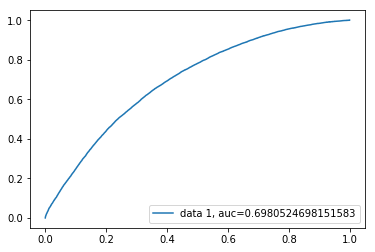

0.2934386225118799
mass= 750
train mass   500.0   750.0   1000.0  1250.0  1500.0
label                                        
0       10009    9903    9963   10015    9935
1       10002   10045   10199    9912   10017
test mass   750.0
label       
0      24826
1      25174
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 37.7min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 188.6min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 248.6min finished


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


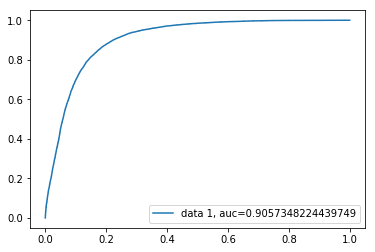

0.6783940241091109
mass= 1000
train mass   500.0   750.0   1000.0  1250.0  1500.0
label                                        
0       10009    9903    9963   10015    9935
1       10002   10045   10199    9912   10017
test mass   1000.0
label        
0       25131
1       24869
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 37.5min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 187.2min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 246.6min finished


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


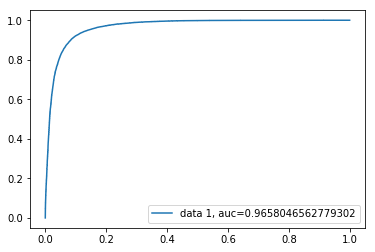

0.8143468523617619
mass= 1250
train mass   500.0   750.0   1000.0  1250.0  1500.0
label                                        
0       10009    9903    9963   10015    9935
1       10002   10045   10199    9912   10017
test mass   1250.0
label        
0       25061
1       24939
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 37.8min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 196.8min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 258.6min finished


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


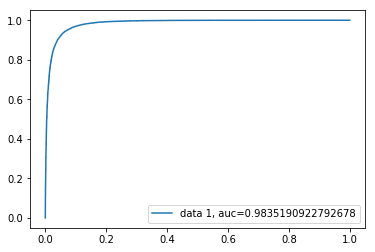

0.8754911798959748
mass= 1500
train mass   500.0   750.0   1000.0  1250.0  1500.0
label                                        
0       10009    9903    9963   10015    9935
1       10002   10045   10199    9912   10017
test mass   1500.0
label        
0       25050
1       24950
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 44.1min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 190.8min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 248.0min finished


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


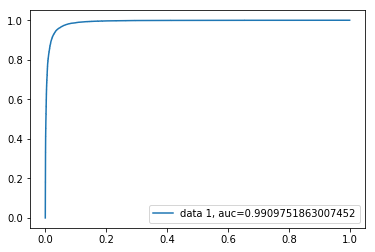

0.9137982828617947
X_train_shape (100000, 28)
X_test_shape (50000, 28)


,tn,fp,fn,tp,acc,prec,recall,F1_score,kappa_cohen,auc
500,14745,10204,7456,17595,0.6468,0.632936,0.702367,0.665847,0.293439,0.698052
750,20191,4635,3402,21772,0.83926,0.824478,0.864861,0.844187,0.678394,0.905735
1000,21885,3246,1397,23472,0.90714,0.878509,0.943826,0.909997,0.814347,0.965805
1250,23014,2047,1066,23873,0.93774,0.921026,0.957256,0.938792,0.875491,0.983519
1500,24072,978,1177,23773,0.9569,0.960486,0.952826,0.956641,0.913798,0.990975


<Figure size 432x288 with 0 Axes>

In [6]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])



for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
    dfmass0=df.loc[df['mass'] == 0]     #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] !=0].sample(random_state=1,n=dfmass0.shape[0])                                                      #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)         #la masa es una caracterísitca
    
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    np.random.seed(1)
    dfmass0test['mass'] = np.random.choice([i], dfmass0test.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test['mass']=dfmass1000test['mass'].astype(float)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=10000*5)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  


    

    X_train=dfmass1000.drop(['label'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc
    print(kappa_cohen)



print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)


display(df_metrics)

In [ ]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

In [ ]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

In [6]:
cwd2=cwd+"sin1000"


mass= 500
train mass   750.0   1000.0  1250.0  1500.0
label                                
0        9903    9963   10015    9935
1       10045   10199    9912   10017
test mass   500.0
label       
0      24949
1      25051
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 24.7min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 138.0min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 185.5min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=11, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


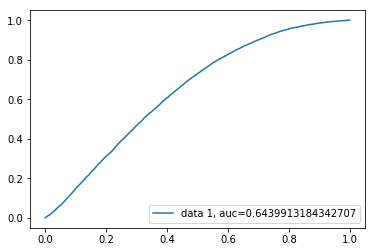

0.1472052637340433
mass= 750
train mass   500.0   1000.0  1250.0  1500.0
label                                
0       10009    9963   10015    9935
1       10002   10199    9912   10017
test mass   750.0
label       
0      24826
1      25174
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 29.2min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 151.7min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 202.9min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=13, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


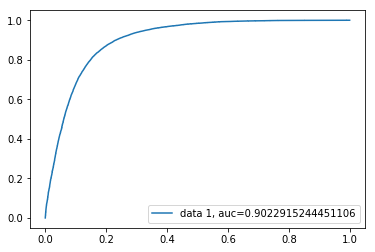

0.668117305452765
mass= 1000
train mass   500.0   750.0   1250.0  1500.0
label                                
0       10009    9903   10015    9935
1       10002   10045    9912   10017
test mass   1000.0
label        
0       25131
1       24869
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 29.8min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 151.8min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 199.5min finished


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


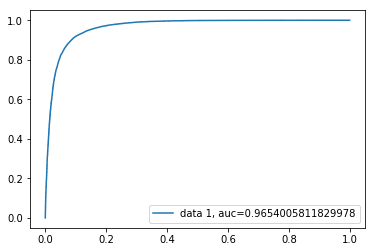

0.8172681892324272
mass= 1250
train mass   500.0   750.0   1000.0  1500.0
label                                
0       10009    9903    9963    9935
1       10002   10045   10199   10017
test mass   1250.0
label        
0       25061
1       24939
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 32.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 152.9min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 201.4min finished


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


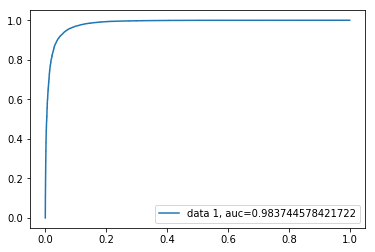

0.8779303770898157
mass= 1500
train mass   500.0   750.0   1000.0  1250.0
label                                
0       10009    9903    9963   10015
1       10002   10045   10199    9912
test mass   1500.0
label        
0       25050
1       24950
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 27.8min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 141.4min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 190.1min finished


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=11, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


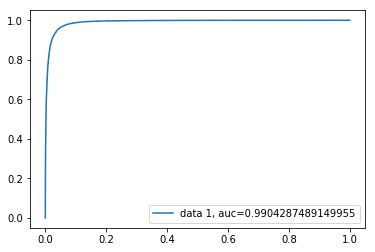

0.9105179025396355
X_train_shape (80048, 28)
X_test_shape (50000, 28)


,tn,fp,fn,tp,acc,prec,recall,F1_score,kappa_cohen,auc
500,18369,6580,14754,10297,0.57332,0.61012,0.411041,0.491175,0.147205,0.643991
750,20318,4508,3787,21387,0.8341,0.825912,0.849567,0.837573,0.668117,0.902292
1000,22413,2718,1851,23018,0.90862,0.894389,0.92557,0.909712,0.817268,0.965401
1250,23069,1992,1060,23879,0.93896,0.923003,0.957496,0.939933,0.87793,0.983745
1500,24053,997,1240,23710,0.95526,0.959647,0.950301,0.954951,0.910518,0.990429


<Figure size 432x288 with 0 Axes>

In [7]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])


for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
    dfmass0=df.loc[df['mass'] == 0]     #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] !=0].sample(random_state=1,n=dfmass0.shape[0])                                                      #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)         #la masa es una caracterísitca
    #Lo único que cambia es uqe quito los registros con esa masa:
    dfmass1000=dfmass1000.loc[ (dfmass1000['mass'] !=i)]       
  
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    np.random.seed(1)
    dfmass0test['mass'] = np.random.choice([i], dfmass0test.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test['mass']=dfmass1000test['mass'].astype(float)
    dfmass1000test=dfmass1000test.sample(n=10000*5,random_state=1)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  

        
    X_train=dfmass1000.drop(['label'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

    #Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
   # plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)
    
    print(kappa_cohen)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)


display(df_metrics)

In [8]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

(80048, 28)
(50000, 28)


0    25050
1    24950
Name: label, dtype: int64

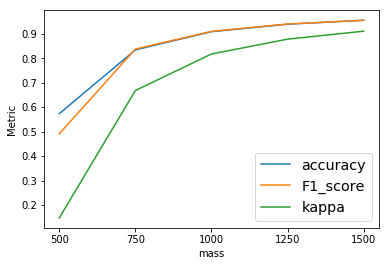

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

In [10]:
X_train.head()

,lep_pt,lep_eta,lep_phi,met_miss,met_phi,jets_no,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_wwbb,mass
1363114,2.138371,-1.177687,-0.662546,0.813077,-0.825125,0.850488,1.685600,-1.501764,1.224920,0,...,0.722574,-0.712762,1.066300,1,-0.008788,-0.393388,-0.488981,-0.575411,1.134008,1000.0
2580460,-0.450152,0.563072,-1.118580,-0.644837,-0.139600,-1.054221,-0.849833,0.343709,0.256403,1,...,-0.764570,1.091759,0.783253,0,-0.582873,-0.376167,-0.327127,-0.001318,-0.983530,500.0
3632821,-0.267210,0.425847,-1.376122,-2.390117,-0.731404,-0.005984,-0.873454,0.165200,0.983288,0,...,0.001667,-0.565443,1.655424,1,-0.294969,-0.156301,-0.290609,-1.251931,-1.449527,500.0
2617239,1.350530,-0.596962,1.043397,-0.569304,0.947963,-1.054221,1.393637,-0.441701,-0.575884,1,...,0.506738,-0.154636,-0.067626,0,0.592873,1.510981,-0.342940,1.468311,0.653204,1250.0
3584249,-0.622183,-0.926690,0.068050,0.195970,0.029102,-1.054221,0.251026,-0.518644,-1.249937,1,...,-1.308751,0.467340,-1.330151,0,0.785943,-0.271922,-0.324294,0.390380,-0.632149,1250.0


In [11]:
X_test.head()

,lep_pt,lep_eta,lep_phi,met_miss,met_phi,jets_no,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_wwbb,mass
8158,0.942930,-0.445461,1.528926,2.066856,1.348279,-0.005984,1.709677,0.986124,-0.465190,1,...,-0.086773,0.122667,0.324932,0,0.089382,-0.611450,-0.213931,2.724287,1.443621,1500.0
569512,1.448068,0.151954,0.161901,0.995798,0.416885,-1.054221,0.613575,-1.917273,-1.692672,1,...,1.992937,-0.823763,-1.433735,0,2.659771,3.049345,-0.379623,2.213295,1.368753,1500.0
368490,1.115222,1.027837,0.897663,1.854753,0.717214,-0.005984,1.799014,2.230610,-1.009539,0,...,1.736581,1.072514,0.477593,1,0.921477,0.362514,-0.265669,1.396105,1.420797,1500.0
578796,0.276594,-0.768615,-1.510183,0.012417,1.127741,-1.054221,-0.852084,-0.813073,0.605411,1,...,-1.603850,-0.137380,0.884252,0,-0.535857,-0.540330,0.816888,-0.686401,-1.283956,1500.0
194654,-1.406204,1.523638,-0.992994,-0.421131,0.295516,-0.005984,-0.845890,1.007031,-0.358266,0,...,-0.077954,0.742812,-1.006390,0,-0.214257,-0.719426,-0.344904,-0.859606,-1.192399,1500.0


In [12]:
y_train.head()

1363114    1
2580460    1
3632821    0
2617239    1
3584249    0
Name: label, dtype: category
Categories (2, int64): [0, 1]

In [13]:
y_test.head()

8158      1
569512    1
368490    1
578796    0
194654    0
Name: label, dtype: category
Categories (2, int64): [0, 1]